In [33]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hddm
import warnings
warnings.filterwarnings('ignore')

## Prepare our data

In [36]:
data = hddm.load_csv('16md_17td_responses.csv')
groups = hddm.load_csv('16md_17td_groups.csv')



data = data.rename(columns={'ACC':'response','Subject':'subj_idx','RT':'rt'})
data.rt = data.rt/1000
data = data[data.rt != 0]
data = data.dropna()
pids = data.subj_idx.unique()
group_ids = []

for pid in data.subj_idx:
    group = list(groups[groups.Subject == pid].Group)[0]
    group_ids.append(str(group))
data['Group'] = group_ids
data.head()

,subj_idx,response,rt,Difficulty,Condition,Group
0,105,1,1.447,Simple,Addition,TD
1,105,1,1.309,Simple,Addition,TD
2,105,1,1.532,Simple,Addition,TD
3,105,1,2.478,Simple,Addition,TD
4,105,1,2.207,Simple,Addition,TD


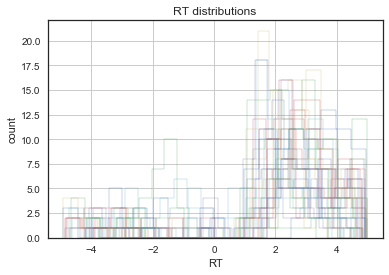

In [37]:
sns.set_style('white')
data = hddm.utils.flip_errors(data) #error RTs are flipped to be negative
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20,histtype='step', ax=ax)

In [38]:
m = hddm.HDDM(data,depends_on={'v':['Group','Condition','Difficulty'],
                               'a':['Group','Condition','Difficulty'],
                               't':['Group','Condition','Difficulty']})
m.find_starting_values()
m.sample(5000, burn=500, dbname='traces.db', db='pickle')
m.save('16md_17td_hddm')

 [-----------------100%-----------------] 5001 of 5000 complete in 57012.4 sec

In [48]:
stats = m.gen_stats()
stats.to_csv('16md_17td_hddm_summary_stats.csv')

In [47]:
#m.plot_posteriors()

P(Add.Complex.TD > Add.Complex.MD) =  0.903777777778
P(Add.Simple.TD > Add.Simple.MD) =  0.986888888889
P(Sub.Complex.TD > Sub.Complex.MD) =  0.972222222222
P(Sub.Simple.TD > Sub.Simple.MD) =  0.982888888889


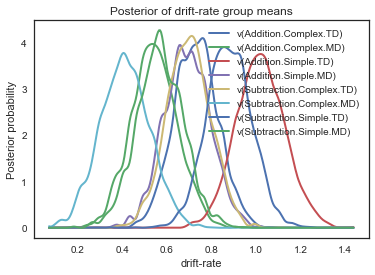

In [45]:
drift_vars = m.nodes_db.node[['v(Addition.Complex.TD)', 'v(Addition.Complex.MD)',
                              'v(Addition.Simple.TD)', 'v(Addition.Simple.MD)',
                              'v(Subtraction.Complex.TD)', 'v(Subtraction.Complex.MD)',
                              'v(Subtraction.Simple.TD)', 'v(Subtraction.Simple.MD)']]
hddm.analyze.plot_posterior_nodes(drift_vars)
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

print "P(Add.Complex.TD > Add.Complex.MD) = ", (drift_vars[0].trace() > drift_vars[1].trace()).mean()
print "P(Add.Simple.TD > Add.Simple.MD) = ", (drift_vars[2].trace() > drift_vars[3].trace()).mean()
print "P(Sub.Complex.TD > Sub.Complex.MD) = ", (drift_vars[4].trace() > drift_vars[5].trace()).mean()
print "P(Sub.Simple.TD > Sub.Simple.MD) = ", (drift_vars[6].trace() > drift_vars[7].trace()).mean()

P(Add.Complex.TD > Add.Complex.MD) =  0.116888888889
P(Add.Simple.TD > Add.Simple.MD) =  0.727777777778
P(Sub.Complex.TD > Sub.Complex.MD) =  0.98
P(Sub.Simple.TD > Sub.Simple.MD) =  0.882666666667


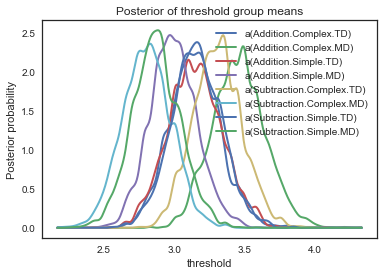

In [50]:
thresh_vars = m.nodes_db.node[['a(Addition.Complex.TD)', 'a(Addition.Complex.MD)',
                              'a(Addition.Simple.TD)', 'a(Addition.Simple.MD)',
                              'a(Subtraction.Complex.TD)', 'a(Subtraction.Complex.MD)',
                              'a(Subtraction.Simple.TD)', 'a(Subtraction.Simple.MD)']]
hddm.analyze.plot_posterior_nodes(thresh_vars)
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('Posterior of threshold group means')

print "P(Add.Complex.TD > Add.Complex.MD) = ", (thresh_vars[0].trace() > thresh_vars[1].trace()).mean()
print "P(Add.Simple.TD > Add.Simple.MD) = ", (thresh_vars[2].trace() > thresh_vars[3].trace()).mean()
print "P(Sub.Complex.TD > Sub.Complex.MD) = ", (thresh_vars[4].trace() > thresh_vars[5].trace()).mean()
print "P(Sub.Simple.TD > Sub.Simple.MD) = ", (thresh_vars[6].trace() > thresh_vars[7].trace()).mean()

P(Add.Complex.TD > Add.Complex.MD) =  0.601333333333
P(Add.Simple.TD > Add.Simple.MD) =  0.816
P(Sub.Complex.TD > Sub.Complex.MD) =  0.253777777778
P(Sub.Simple.TD > Sub.Simple.MD) =  0.19


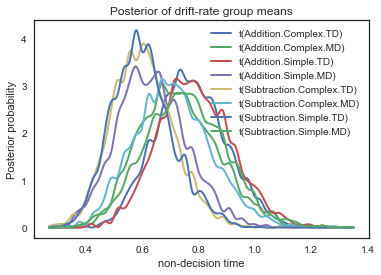

In [51]:
thresh_vars = m.nodes_db.node[['t(Addition.Complex.TD)', 't(Addition.Complex.MD)',
                              't(Addition.Simple.TD)', 't(Addition.Simple.MD)',
                              't(Subtraction.Complex.TD)', 't(Subtraction.Complex.MD)',
                              't(Subtraction.Simple.TD)', 't(Subtraction.Simple.MD)']]
hddm.analyze.plot_posterior_nodes(thresh_vars)
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

print "P(Add.Complex.TD > Add.Complex.MD) = ", (thresh_vars[0].trace() > thresh_vars[1].trace()).mean()
print "P(Add.Simple.TD > Add.Simple.MD) = ", (thresh_vars[2].trace() > thresh_vars[3].trace()).mean()
print "P(Sub.Complex.TD > Sub.Complex.MD) = ", (thresh_vars[4].trace() > thresh_vars[5].trace()).mean()
print "P(Sub.Simple.TD > Sub.Simple.MD) = ", (thresh_vars[6].trace() > thresh_vars[7].trace()).mean()